In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv


# Problem Statement:

Build a predictive model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions

## Goal:

Achieve Precision Farming by Optimizing the Agricultural Production

# About the Dataset
***This dataset will help in recommending the crop for the suitable soil. This will be very useful in Optimizing Agricultural Production.***

## Variable Names and their Uses:

**Nitrogen** *is one of chemical elements that become a part of amino acids. Plants synthesize nitrogen from soils along with other primary elements and turn them into amino acids. These chemical compounds are utilized by plants to increase the production and quality of crops.*

**Phosphorus** *plays a major role in the growth of new tissue and division of cells. Plants perform complex energy transmissions, a function that requires phosphorus.*

**Potassium** *is a paramount macro-element for overall survival of living things. It is an abundant mineral macronutrient present in both plant and animals tissues. It is necessary for the proper functionality of all living cells.*

**Temperature**: *Germination is a miraculous event that involves a number of factors that include air, water, light, and, of course, temperature. Germination increases in higher temperatures – up to a point. Once the seeds reach optimum temperatures, which depends on the plant, germination begins to decline.*

The **pH** *range 5.5–6.5 is optimal for plant growth as the availability of nutrients is optimal.
Besides disease, rainfall can also determine how fast a crop will grow from seed, including when it will be ready for harvesting. A good balance of rain and proper irrigation can lead to , which can cut down on germination time and the length between seeding and harvest*

## Importing Libraries and Loading dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/kaggle/input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv")

## To check the shape (number of rows & columns) of the dataset

In [4]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (2200, 8)


## Inspecting the first 10 rows of the Dataset

In [5]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


### Checking for Null values if any

In [6]:
print("Missing/Null values in the our data set:")
data.isnull().sum()

Missing/Null values in the our data set:


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### Describe (statistical) detail of data

In [7]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Note:

*There are outliers present in the dataset*

### To check the unique value in the label(crops) column of the dataset

In [8]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# To check for duplicates

data.duplicated().sum()

#No duplicates observed

0

In [11]:
#Renaming columns

data.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

### To check the overall summary for all variables

In [12]:
print("Average Ratio of Nitrogen in the soil : {0:.2f}".format(data['Nitrogen'].mean()))
print("Average Ratio of Phosphorous in the soil : {0:.2f}".format(data['Phosphorus'].mean()))
print("Average Ratio of Potassium in the soil : {0:.2f}".format(data['Potassium'].mean()))
print("Average Temperature in celsius : {0:.2f}".format(data['Temperature'].mean()))
print("Average Humidity in the soil : {0:.2f}".format(data['Humidity'].mean()))
print("Average Ph_scale in the soil : {0:.2f}".format(data['pH'].mean()))
print("Average Rain_fall in the soil : {0:.2f}".format(data['Rainfall'].mean()))

Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorous in the soil : 53.36
Average Ratio of Potassium in the soil : 48.15
Average Temperature in celsius : 25.62
Average Humidity in the soil : 71.48
Average Ph_scale in the soil : 6.47
Average Rain_fall in the soil : 103.46


### Let's check the summary statistics of each for the crops
**Use of Interactive function(@interact) from ipywidget library; to find the best optimum climatic condition for any specific crop**

In [13]:
@interact #for dropdodwn box
def summary(crops=list(data['Label'].value_counts().index)):
    x=data[data['Label'] == crops]
    print("------------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['Nitrogen'].min())
    print("Average Nitrogen required:", x['Nitrogen'].mean())
    print("Maximum Nitrogen required:", x['Nitrogen'].max())
    print("------------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required:",x['Potassium'].min())
    print("Average Potassium required:",x['Potassium'].mean())
    print("Maximum Potassium required:",x['Potassium'].max())
    print("------------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required:{0:.2f}".format(x['Temperature'].min()))
    print("Average Temperature required:{0:.2f}".format(x['Temperature'].mean()))
    print("Maximum Temperature required:{0:.2f}".format(x['Temperature'].max()))
    print("------------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required:{0:.2f}".format(x['Humidity'].min()))
    print("Average Humidity required:{0:.2f}".format(x['Humidity'].mean()))
    print("Maximum Humidity required:{0:.2f}".format(x['Humidity'].max()))
    print("------------------------------------------------")
    print("Statistics for Phscale")
    print("Minimum Phscale required:{0:.2f}".format(x['pH'].min()))
    print("Average Phscale required:{0:.2f}".format(x['pH'].mean()))
    print("Maximum Phscale require:{0:.2f}".format(x['pH'].max()))
    print("------------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required:{0:.2f}".format(x['Rainfall'].min()))
    print("Average Rainfall required:{0:.2f}".format(x['Rainfall'].mean()))
    print("Maximum Rainfall required:{0:.2f}".format(x['Rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

# EDA - Exploratory Data Analysis

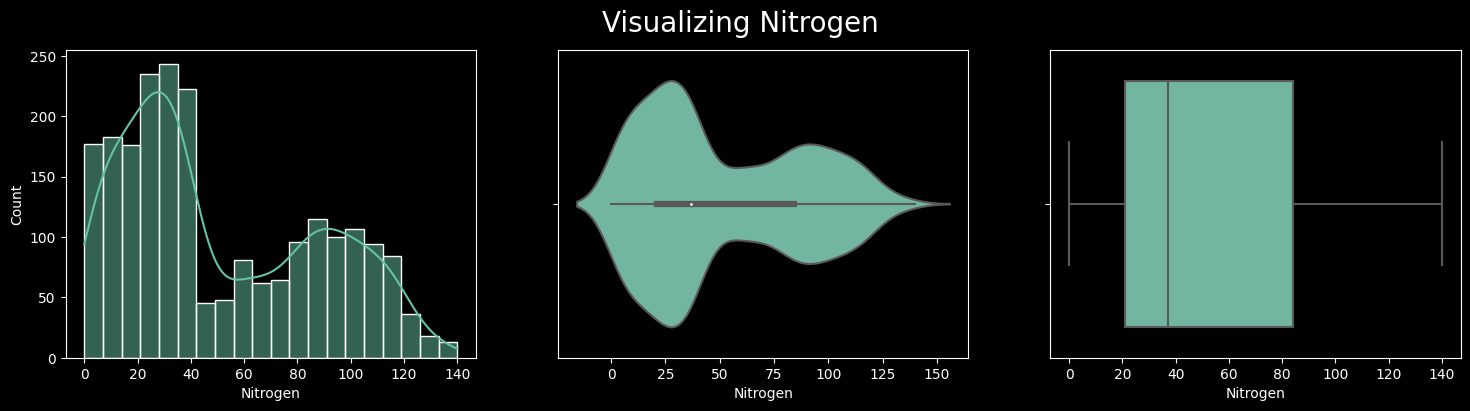

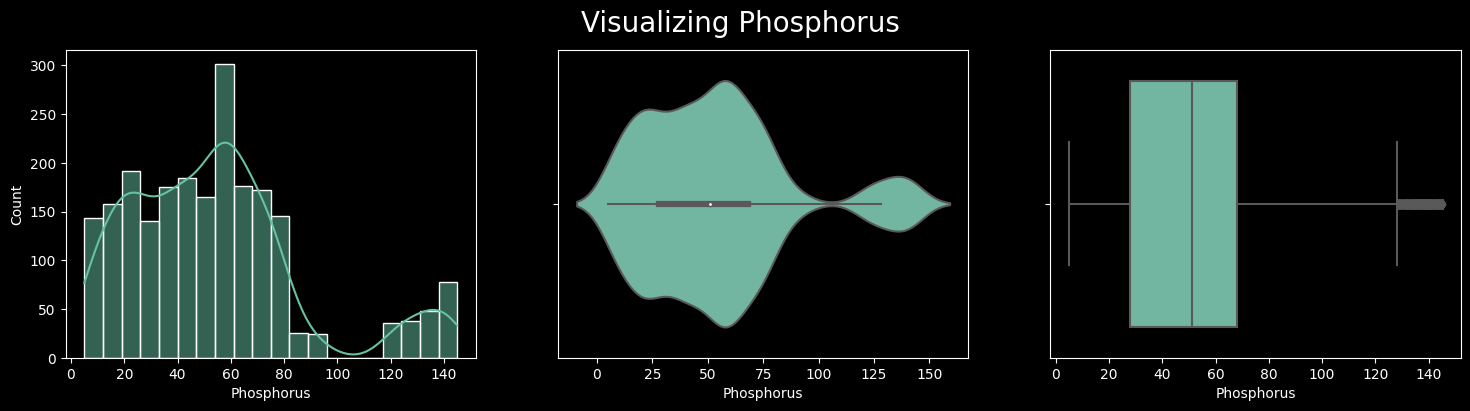

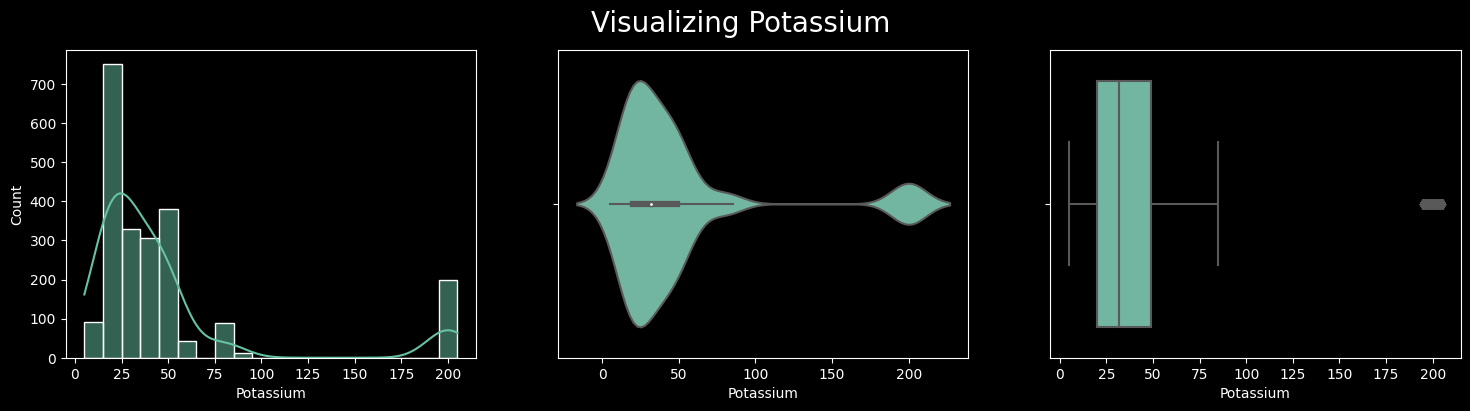

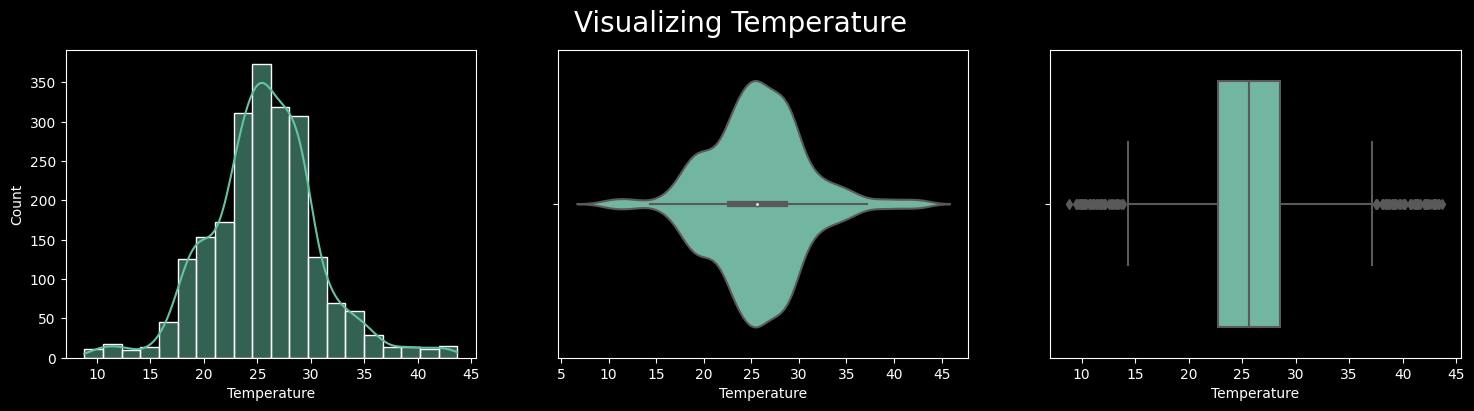

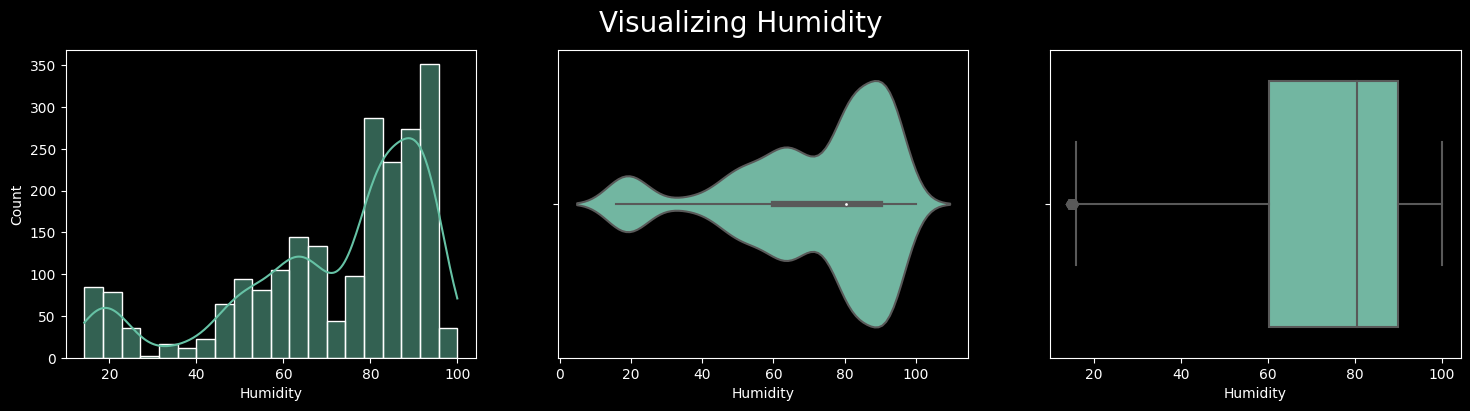

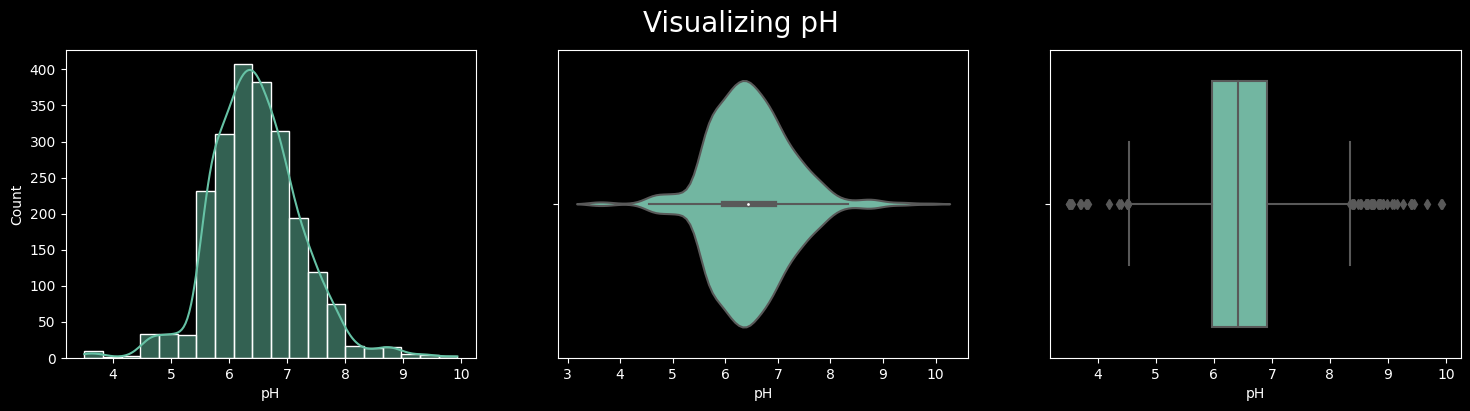

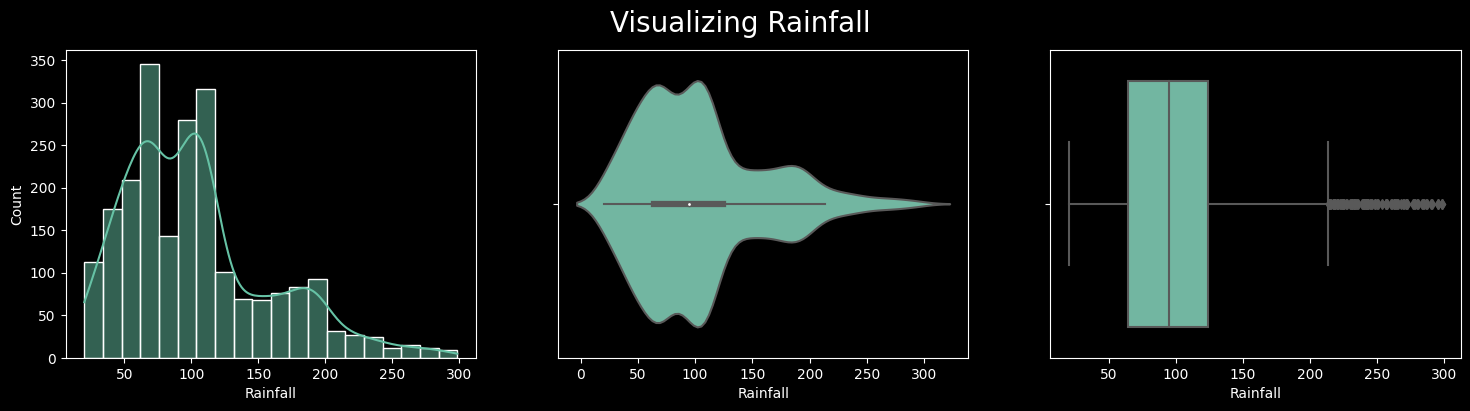

In [14]:
plt.style.use('dark_background')
sns.set_palette("Set2")
for i in data.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=data,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=data,x=i,ax=ax[1])
    sns.boxplot(data=data,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

## Note:
_These graphs confirm that there are outliers present in the data. Also it helps us understand the overall distribution of the dataset_

In [15]:
# The GROUP BY statement groups rows that have the same values into summary rows.

grouped = data.groupby(by='Label').mean().reset_index()

In [16]:
grouped

,Label,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


### Lets compare the Average Requirement of each crops for an average condition

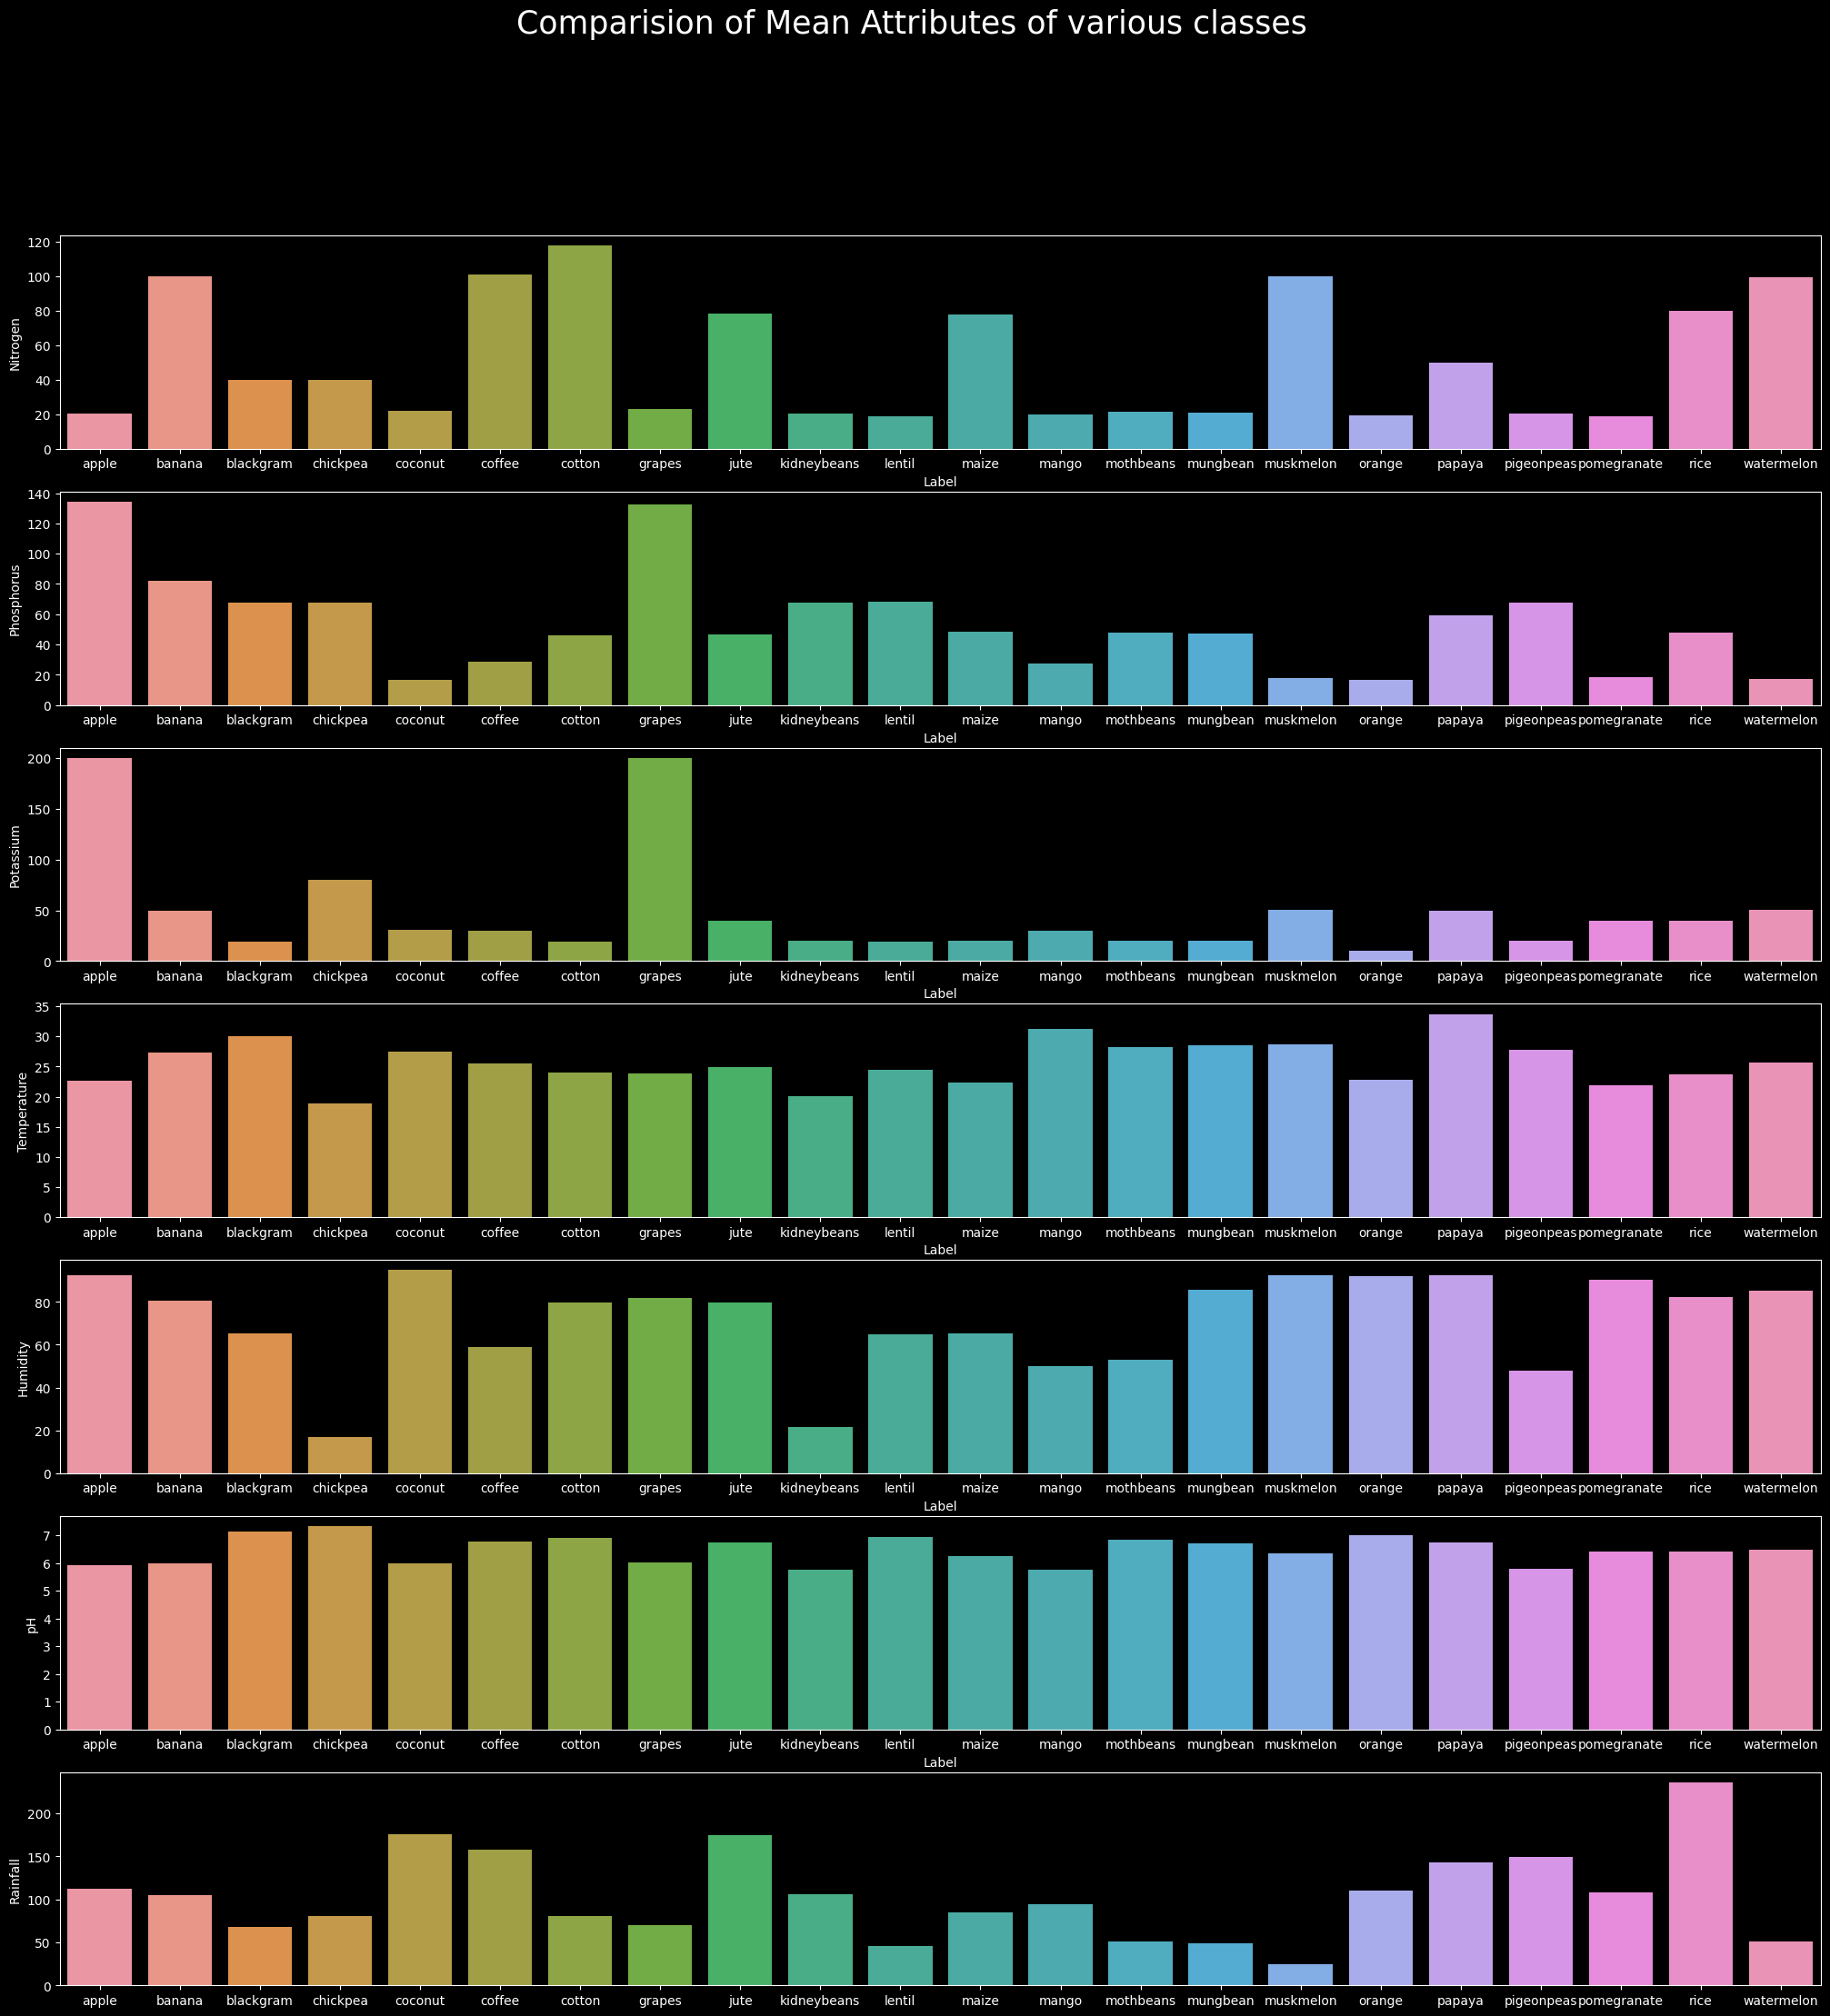

In [17]:
fig,ax=plt.subplots(7,1,figsize=(25,25))
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,x='Label',y=i,ax=ax[index])
    plt.suptitle("Comparision of Mean Attributes of various classes",size=25)
    plt.xlabel("")

## Note:

*• Cotton requires most Nitrogen.*

*• Apple requires most Phosphorus.*

*• Grapes require most Potassium.*

*• Papaya requires a hot climate.*

*• Coconut requires a humid climate.*

*• Chickpea requires high pH in soil.*

*• Rice requires huge amount of Rainfall.*

### Identifying the crops that requires unusual or specific weather and soil mineral conditions

In [18]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Most Nitrogen requiring crops:
--------------------------------
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
-------------------------------
Top 5 Most Phosphorus requiring crops:
--------------------------------
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
-------------------------------
Top 5 Most Potassium requiring crops:
--------------------------------
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
-------------------------------
Top 5 Most Temperature requiring crops:
--------------------------------
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
-------------------------------
Top 5 Most Humidity requiring crops:
--------------------------------
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34

## Lets Find out Some Intersting Facts

In [19]:
print("Some Interesting Patterns:")
print("--------------------------")
print("Crops which requires very High Ratio of Nirtogen Content in Soil:", data[data['Nitrogen'] > 120]['Label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['Phosphorus'] > 100]['Label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['Potassium'] > 200]['Label'].unique())
print("Crops which requires very High Rainfall:", data[data['Rainfall'] > 200]['Label'].unique())
print("Crops which requires very Low Temperature:", data[data['Temperature'] > 10]['Label'].unique())
print("Crops which requires very High Temperature:", data[data['Temperature'] > 40]['Label'].unique())
print("Crops which requires very Low Humidty:", data[data['Humidity'] > 20]['Label'].unique())
print("Crops which requires very Low pH:", data[data['pH'] < 4]['Label'].unique())
print("Cr0ps which requires very Low pH:", data[data['pH'] > 9]['Label'].unique())

Some Interesting Patterns:
--------------------------
Crops which requires very High Ratio of Nirtogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Humidty: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
Crops which requires very Low pH: ['

# Seasonal Crops Recommendations

In [20]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(data[(data['Temperature'] > 30) & (data['Humidity'] > 50)]['Label'].unique())
print("-----------------------------------------")
print("Winter Crops")
print(data[(data['Temperature'] < 20) & (data['Humidity'] > 30)]['Label'].unique())
print("-----------------------------------------")
print("Rainy Crops")
print(data[(data['Rainfall'] > 200) & (data['Humidity'] > 30)]['Label'].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


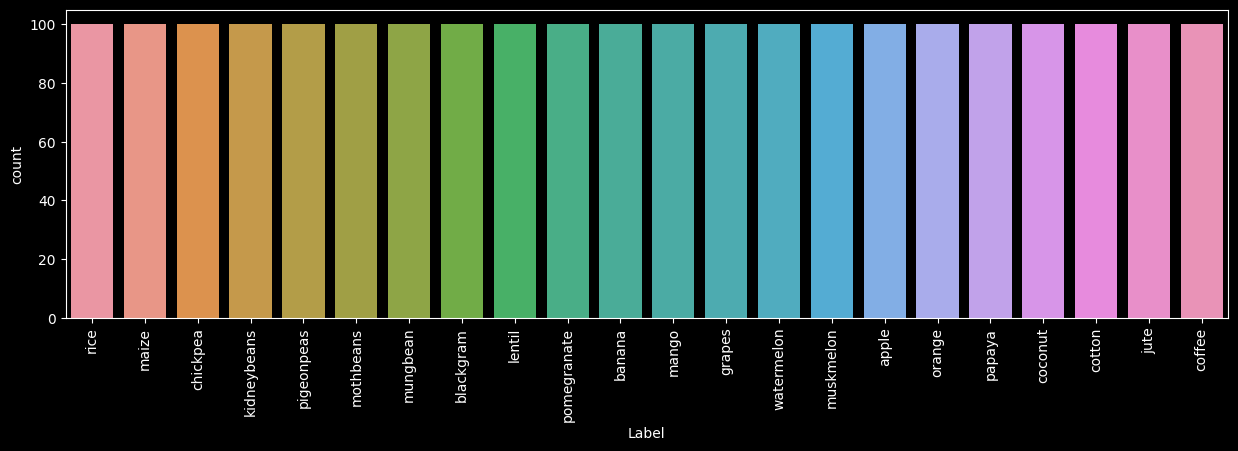

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(data=data,x='Label')
plt.xticks(rotation = 90)
plt.show()

### Note:
*The classes are balanced. Accuracy would be a good metric.*


In [22]:
import plotly.express as px

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
data_pca=pca.fit_transform(data.drop(['Label'],axis=1))
data_pca=pd.DataFrame(data_pca)
fig = px.scatter(x=data_pca[0],y=data_pca[1],color=data['Label'],title="Decomposed using PCA")
fig.show()

In [23]:
pca3=PCA(n_components=3)
data_pca3=pca3.fit_transform(data.drop(['Label'],axis=1))
data_pca3=pd.DataFrame(data_pca3)
fig = px.scatter_3d(x=data_pca3[0],y=data_pca3[1],z=data_pca3[2],color=data['Label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [24]:
fig = px.scatter(x=data['Nitrogen'],y=data['Phosphorus'],color=data['Label'],title="Nitrogen VS Phosphorus")
fig.show()

In [25]:
fig = px.scatter(x=data['Phosphorus'],y=data['Potassium'],color=data['Label'],title="Phosphorus VS Potassium")
fig.show()

In [26]:
#would be required in future to get the names of crops back from encoded form

names = data['Label'].unique()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Label']=encoder.fit_transform(data['Label'])
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


## Note:
*Encoding the target values to its respective numerical value is necessary because our machine learning model won't be able to understand strings!*

In [27]:
from sklearn.cluster import KMeans

# removing the labels column
x = data.drop(['Label'], axis=1)

# selecting all the values of the data
x = x.values

# checking the shape
print(x.shape)


(2200, 7)


## Lets determine the Optimum Number of Clusters within the Dataset by using the Elbow Algorithm


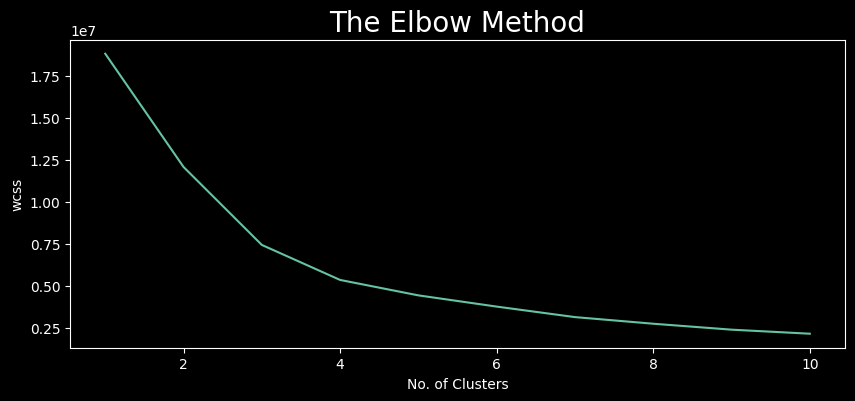

In [28]:
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
# Lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


## Note:
*There are two elbows first at 3 & second at 4; always select the last Elbow.* 

*Hence our Cluster should be 4*

## Lets implement the K means algorithm to perform Clustering analysis

In [29]:
km = KMeans(n_clusters=4,init='k-means++',max_iter = 300,n_init=10,random_state=0)
y_means =km.fit_predict(x)

#Lets find out the Result
a=data['Label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

# let check the Cluster  of each Crops
print(" Lets check the Results After Applying the K Means Clustering Analysis: \n")
print("Crops in First Cluster:", z[z['cluster']==0]['Label'].unique())
print("--------------------------------------------------------------")
print(" Crops in Second cluster:", z[z['cluster']==1]['Label'].unique())
print('---------------------------------------------------------------')
print("Crops in Third cluster:", z[z['cluster'] ==2]['Label'].unique())
print("----------------------------------------------------------------")
print("Crops in Forth Cluster:",z[z['cluster']==3]['Label'].unique())


 Lets check the Results After Applying the K Means Clustering Analysis: 

Crops in First Cluster: [11  3  9 18 13 14  2 10 19 12 16 17  4]
--------------------------------------------------------------
 Crops in Second cluster: [11  1 21 15 17  6  5]
---------------------------------------------------------------
Crops in Third cluster: [7 0]
----------------------------------------------------------------
Crops in Forth Cluster: [20 18 17  4  8  5]


## Note:
*This will help Farmers in adopting similar kind of crops and yield maximum productivity*

# Splitting up the Dataset for Predictive Modelling

In [30]:
# Lets split the Dataset for Predictive Modelling
y = data['Label']
x = data.drop(['Label'], axis = 1)

print("Shape of x:", x.shape)
print("shape of y:", y.shape)

Shape of x: (2200, 7)
shape of y: (2200,)


# Now, its time to divide the data into two sets; train_data & test_data

In [31]:
# Lets create Training and Testing Sets for Validation of Results

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", x_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440, 7)


## Let's build a predictive model guiding us about the best productive crop as per the climatic condition and minerals; for which we need to use machine learning algorithm to train our model.

After our model is trained, we will use the model for further predictions.

**We are using logistic regression algorithm to train our model.**

*Logistic regression is a probabilistic model; Suitable for cases of probabilistic - or multiple - class types.* 

We have 22 classes in our cases.

# Creation of a Predictive Model

In [32]:
# Lets creat a Predictive Model

from sklearn.linear_model import LogisticRegression 
# Importing LogisticRegression from SKlearn to make our predective model

model = LogisticRegression(solver = 'liblinear') 
# Storing our Algorithm in varriable name model

#model=LogisticRegression()
model=model.fit(x_train, y_train) 
# Our model hase been trained from the data stored into training data set, Our model is fully trained now , further function used to predection

y_pred = model.predict(x_test) 
#  we predict our model for x_test data set and further stored it into y_pred variable

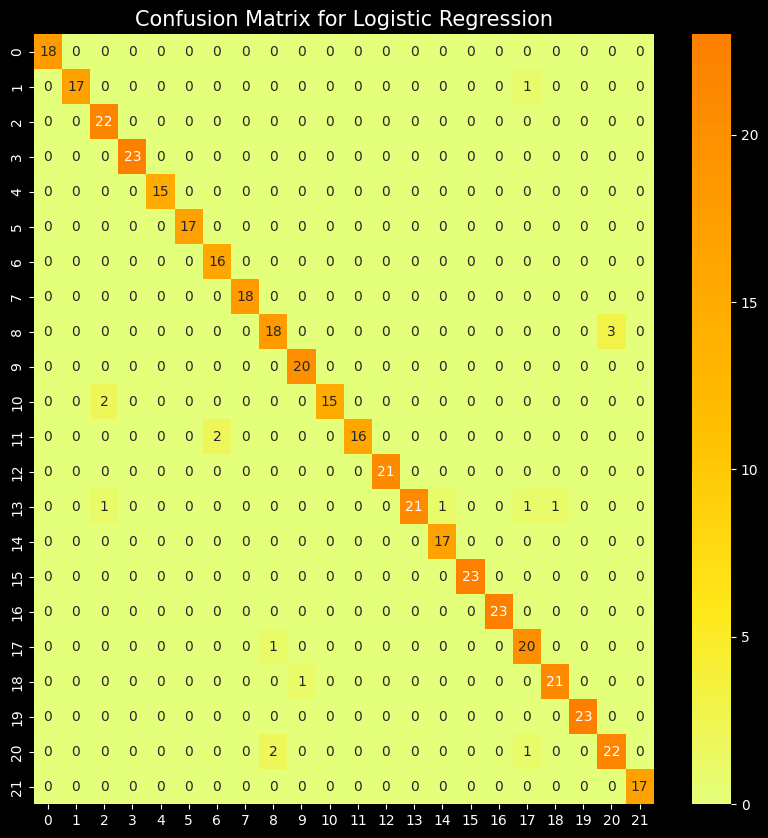

In [33]:
# Lets evaluate the Model Performance
from sklearn.metrics import confusion_matrix

# Lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()


# To print the Classification Report:


In [34]:
from sklearn.metrics import classification_report

# Assuming we have defined and populated y_test and y_pred correctly
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        18
           2       0.88      1.00      0.94        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       0.89      1.00      0.94        16
           7       1.00      1.00      1.00        18
           8       0.86      0.86      0.86        21
           9       0.95      1.00      0.98        20
          10       1.00      0.88      0.94        17
          11       1.00      0.89      0.94        18
          12       1.00      1.00      1.00        21
          13       1.00      0.84      0.91        25
          14       0.94      1.00      0.97        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        23
          17       0.87    

## Note:
*With the help of classification report; we got the value of Precision & Recall, further if both precicion and recall are at optimum value, it indicates strong accuracy of our training model.*

***96% Accuracy for our predictive model has been achived.***

## Inspecting the Head of the Dataset

In [35]:
# Checking the Head of the Dataset

data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


# To Pridict a suitable Crop for Given Climatic Condition 

In [36]:
prediction = model.predict((np.array([[50, #for Nitrogen
                                      45,  #for Phosphorous
                                      10,  #for Potassium
                                      20,  #for Temperature
                                      80,  #for Humidity
                                      7,   #for pH
                                      200]])))#for Rainfall
print("The suggested crop for given climatic condition is:",prediction)

The suggested crop for given climatic condition is: [16]


# Key Insights:
**1. Crops and Nutrient Requirements:**

• Certain crops have distinct requirements for nitrogen, phosphorus, and potassium.
• Cotton requires the most nitrogen, while apple and grapes demand the highest phosphorus and potassium, respectively.

**2. Climate and Soil Preferences:**

• Different crops have varying preferences for temperature, humidity, pH, and rainfall.
• Papaya and mango require high temperatures, while coconut needs a humid climate.
• Chickpeas thrive in higher pH soils, whereas rice demands significant rainfall.

**3. Seasonal Crop Recommendations:**

• Identified crops suitable for different seasons:

**• Summer Crops**: _Pigeonpeas, mothbeans, mango, grapes, orange, papaya._

**• Winter Crops**: _Maize, lentil, pomegranate, grapes, orange._

**• Rainy Crops**: _Rice, papaya, coconut._

**4. Outliers and Data Distribution**:

• Outliers are present across the dataset affecting nutrient levels and climatic conditions.

• Visualizations highlight the distribution and variability of data attributes.

**5. Clustering Analysis:**

• Implemented K-means clustering to group crops based on similar conditions.

• Identified clusters with crops having comparable requirements for optimal growth.

# Recommendations:
**1. Precision Farming Strategies:**

• Employ precision farming techniques based on identified nutrient and climatic requirements for different crops.

**2. Crop-Specific Planning:**

• Farmers should plan crops based on seasonal and regional suitability for better yields.

**3. Outlier Management:**

• Address outliers in the dataset to ensure accurate predictive modeling.

**4. Machine Learning Application:**

• Deploy machine learning models to predict suitable crops for given soil and climatic conditions.

**5. Further Research:**

• Explore advanced techniques to handle outliers and improve predictive accuracy.

**_Implementing these recommendations can significantly enhance agricultural productivity and assist farmers in making informed decisions based on climatic and soil conditions._**

# Contact:

**LinkedIn:** https://www.linkedin.com/in/gyan-ashish/

**Email:** gyanashish753@gmail.com

_Thank you!_